# General  
Template for labjournaal. See https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html for options to use markdown.  
  
**Name:** Dylan Groeneveld  
**Title of the experiment:** Spectraallijn  
**Starting date:** 2 Maart 2022  
**Expected enddate:** 18 Maart 2022  
**Partner:** Alex van Solingen  
**Goal of the experiment:** "Het doel van deze proef is de golflengte van deze spectraallijnen zo nauwkeurig mogelijk te bepalen."  
**Research question:** Wat is de golflengte van de gele, groene en blauwe spectraallijn van kwik?  
**Expectations or Hypothesis:** Respectievelijk 577.1 – 579.1, 546.1 en 435.8 nm  
**Desired accuracy:** n/a  
  
  
  

In [15]:
#import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
from IPython.display import display, Markdown, Latex

**Configuration**

In [16]:
# Plotgerelateerde code

DEFAULT_FIGSIZE = None #(12, 9)

def save_fig(name):
    plt.savefig(f'image/{name}.eps')

# Enum voor verschillende kleuren licht

YELLOW = 'yellow'
GREEN = 'green'
BLUE = 'blue'

# Preparation
 


**Assignments:**  

**Opdracht 1**

Het licht uit beide bronnen komt natuurlijk ook in punt M terecht. Hoe groot is dan het weglengte (fase) verschil? Wat betekent dat in termen van constructieve of destructieve interferentie? Hangt dit af van de golflengte van het licht?

Het weglente verschil is $d \sin \theta$

**Opdracht 2**

Kan m ook negatief zijn? Zo ja, wat betekent dit voor θ? Waar ligt P dan?

Ja. P ligt dan onder M

**Opdracht 3**

Welke invloed heeft een toename in d op m en θ, en welke invloed heeft een afname? En welk effect heeft een toename/afname in m op d en θ en een toename/afname in θ op m en d?

- Een toename in d veroorzaakt alleen een afname in $\theta$.
- Een toename in m veroorzaakt alleen een toename in $\theta$.
- Een toename in $\theta$ veroorzaakt niks, maar in het algemeen neemt m toe of d af.

**Opdracht 4**

In Fig. 20.7 is de richting van de eerste orde buiging van licht met één bepaalde golflengte getekend. Geef de vergelijking voor de hoek voor een volgende orde grootte. Geef van elk van de variabelen in de vergelijking aan of ze constant zijn of niet. Gebruik vgl. (20.1).

$$
\theta = \arcsin \frac{2\lambda}{d}
$$

- $\lambda$: constant
- $d$: constant

**Opdracht 5**

m kan ook negatief zijn. Wat zegt dit over de relatie tussen de hoeken i en $u_m$?

Als i stijgt, stijgt $u_m$. Als i daalt, daalt $u_m$

**Opdracht 6**

Wanneer wordt vgl. (20.2) gelijk aan vgl. (20.1)?

Als $i=0$

**Opdracht 7**

Laat zien dat als je vgl. (20.3) invult in de tralievergelijking (20.2) dat je dan de volgende voorwaarde krijgt voor licht met de golflengte λ op het vaste punt terecht komt.
$$
2 \cos α \sin φ = −mNλ
$$
waarin het N het aantal lijnen per lengte eenheid is, λ de golflengte en m orde van de buiging. m kan positieve en negatieve waarden (en nul) aannemen.

Neem $i=\alpha+\varphi$, $u_m=\alpha-\varphi$. Laat $N=d^{-1}$. Dan

$$
\begin{aligned}
d \sin u_m &= d \sin i + m\lambda\\
d \sin (\alpha-\varphi) &= d \sin (\alpha+\varphi) + m\lambda\\
d (\sin\alpha \cos-\varphi + \cos\alpha \sin-\varphi) &= d (\sin\alpha \cos\varphi + \cos\alpha \sin\varphi) + m\lambda\\
d \sin\alpha \cos\varphi - d \cos\alpha \sin\varphi &= d \sin\alpha \cos\varphi + d \cos\alpha \sin\varphi + m\lambda\\
-d \cos\alpha \sin\varphi &= d \cos\alpha \sin\varphi + m\lambda\\
2d \cos\alpha \sin\varphi &= -m\lambda\\
2 \cos\alpha \sin\varphi &= -md^{-1}\lambda\\
2 \cos\alpha \sin\varphi &= -mN\lambda\\
\end{aligned}
$$

**Opdracht 8**

Voor de situatie geschetst in Fig. 20.11, is m dan positief of negatief? Klopt dat met je antwoord bij vraag 5?

Sinds $0<\alpha<\pi/2$ en $0<\varphi<\pi/2$, $2\cos\alpha\sin\varphi>0$. Sinds $N>0$ en $\lambda>0$, $-m>0$ en $m<0$.

**Opdracht 9**

Met vgl. (20.4) kunnen we uit metingen van α en φ, λ bepalen. Als we de onzekerheden in α en φ, u(α) en u(φ) noemen, leid dan de doorwerkingsformule voor de onzekerheid in λ , u(λ) af.

$$
\begin{aligned}
-mN\lambda &= 2 \cos\alpha \sin\varphi\\
\lambda &= -\frac{2 \cos\alpha \sin\varphi}{mN}\\
u(\lambda) &= 2 \cdot \sqrt{
    \left(
        \frac{u(\cos\alpha) \sin\varphi}{mN}
    \right)^2 +
    \left(
        \frac{\cos\alpha\ u(\sin\varphi)}{mN}
    \right)^2 +
    \left(
         \frac{\cos\alpha \sin\varphi}{m} \cdot u\left(\tfrac{1}{N}\right)
    \right)^2
} \\
u(\cos\alpha) &= | u(\alpha) \cdot -\sin\alpha | = | u(\alpha) \cdot \sin\alpha | \\
u(\sin\varphi) &= | u(\varphi) \cdot \cos\varphi | \\
u\left(\tfrac{1}{N}\right) &= \left| u(N) \cdot -\tfrac{1}{N^2} \right| \\
\end{aligned}
$$

**Opdracht 10**

Met vgl. (20.5) kan uit metingen van u en ∆u, ∆λ bepaald worden. Je wilt natuurlijk de onzekerheid in ∆λ weten. Als je op de gebruikelijke manier de doorwerkingformule gaat uitrekenen, stuit je op een notatieprobleem. Noem daarom in deze vraag de uitgaande hoek v (was u) en het kleine verschil in uitgaande hoek ∆v (was ∆u). Als we de onzekerheden in v en ∆v aangeven met u(v) en u(∆v), leid dan de doorwerkingsformule voor de onzekerheid in ∆λ, u(∆λ) af.

$$
\begin{aligned}
\Delta\lambda &= \frac{\cos v}{mN} \Delta v \\
u(\Delta\lambda) &= \sqrt{
    \left(
        \frac{\Delta v}{mN} u(\cos v)
    \right)^2 +
    \left(
        \frac{\cos v\Delta v}{m} u\left(\tfrac{1}{N}\right)
    \right)^2 +
    \left(
        \frac{\cos v}{mN} u(\Delta v)
    \right)^2
} \\
u(\cos v) &= \left| u(v) \cdot -\sin v \right| = \left| u(v) \cdot \sin v \right| \\
u\left(\tfrac{1}{N}\right) &= \left| u(N) \cdot -\tfrac{1}{N^2} \right| \\
\end{aligned}
$$

**Opdracht 11**

Bedenk tenminste twee redenen waarom in de praktijk het waargenomen oplossend vermogen kleiner is dan de theoretische waarde.

Bij een kleiner oplossend vermogen is het minimale golflengteverschil groter. Een kleiner oplossend vermogen betekent dus dat het moeilijker is om golflengtes van elkaar te scheiden. Dit kan komen (**kan niet uit de formule worden gelezen, dus ik weet niet echt of dit klopt**) door de aanwezigheid van andere bronnen, die de waarnemingen van de camera beïnvloeden. Daarnaast kan de bron meerdere golflengtes uitzenden waardoor het "signaal" verstoord raakt. De gevoeligheid van de camera kan ook een factor zijn.

**Method:**  
**Theory:**  
**Independent variable:**  
**Dependent variable:**  
**Controlled variablen:**  
**Measurement instruments \& Settings:**  
**Procedure:**  
**Setup(drawing or picture):**  
**Notes:**  
**About accuracy:**  


# Execution

**Constants**

In [17]:
# Constants

# Tralieconstante
N = 600e3 # m^-1
u_N = 0 # m^-1

# Hoek van de 0-de orde stand
alpha = np.deg2rad(15)
u_alpha = np.deg2rad(1)

# Lengte van een pixel in de sensor
L_pixel = 3.6e-6 # m

# Alpha tijdens het tweede deel van het experiment
alpha2 = np.deg2rad(13)
u_alpha2 = np.deg2rad(1)

# Focal lengte
f_2 = 20e-2 # m
u_f_2 = 1e-2 # m

**Measurements**

In [18]:
# Measurements: Explain the names of variables provide only raw data in np.arrays!

# Format: Kleur, Orde, Aflezing (°), Fout (°)
dataset1 = [
    [YELLOW,    1,  3,  1],
    [GREEN,     1,  4,  1],
    [BLUE,      1,  6,  1],
    [BLUE,      -1, 23, 1],
    [GREEN,     -1, 25, 1],
    [YELLOW,    -1, 26, 1],
    [BLUE,      -2, 31, 1],
    [GREEN,     -2, 35, 1],
    [YELLOW,    -2, 37, 1],
    [BLUE,      -3, 40, 1],
    [GREEN,     -3, 46, 1],
    [YELLOW,    -3, 48, 1],
]

# Format: Orde, Aflezing (°), Fout (°), Pixels (px), Fout in pixels (px)
# Kleur is geel
dataset2 = [
    [-1, 23.5, 1, 82,  1],
    [-2, 34.0, 1, 154, 1],
    [-3, 46.0, 1, 230, 1],
    [-4, 59.0, 1, 360, 1],
]

Relocate measurements

In [19]:
# Dataset 1

# Kleuren licht
color = np.array([entry[0] for entry in dataset1])

# Orde
m = np.array([float(entry[1]) for entry in dataset1])

# Aflezing in graden
theta = np.deg2rad([entry[2] for entry in dataset1])
u_theta = np.deg2rad([entry[3] for entry in dataset1])

# Dataset 2
m2 = np.array([float(entry[0]) for entry in dataset2])

# Hoek van uitval op de camera
theta2 = np.deg2rad([float(entry[1]) for entry in dataset2])
u_theta2 = np.deg2rad([float(entry[2]) for entry in dataset2])

# Verschil in hoek van uitval op de camera
s_px = np.array([float(entry[3]) for entry in dataset2])
u_s_px = np.array([float(entry[4]) for entry in dataset2])

**Observations:**  

Onze lichtbron malfunctioneerde, waardoor er twee maxima ontstonden. Door de lens schuin te draaien, vielen de maxima op elkaar, waardoor er een betere straal ontstond, maar de camera kon deze niet goed waarnemen.

**Notes:**

Het toestel waarmee de hoeken in dit experiment werden gemeten had een schaal van 2 graden.

Voor het camera deel van het experiment hebben we de gegevens van een andere groep gebruikt.


# Processing
**Description of processing of raw data into scientific evidence:**


In [20]:
# Berekening van de golflengte van de stralen

phi = theta - alpha # rad
u_phi = np.sqrt(u_theta**2 + u_alpha**2) # rad
print(f'𝜑 = \n{phi}')
print(f'u(𝜑) = \n{u_phi}')
print()

# Er worden "tussenvariabelen" gebruikt voor een betere leesbaarheid

cos_alpha = np.cos(alpha)
u_cos_alpha = np.abs(u_alpha * np.sin(alpha))
print(f'cos(𝛼) = {cos_alpha}')
print(f'u(cos(𝛼)) = {u_cos_alpha}')
print()

sin_phi = np.sin(phi)
u_sin_phi = np.abs(u_phi * np.cos(phi))
print(f'sin(𝜑) = \n{sin_phi}')
print(f'u(sin(𝜑)) = \n{u_sin_phi}')
print()

N_inv = 1/N # m^-1
u_N_inv = np.abs(-1*N**-2 * u_N) # m^-1

# Hier wordt de golflengte berekend uit de tussenvariabelen

wavelength = -2 * np.cos(alpha) * np.sin(phi) / (m * N) # m
u_wavelength = 2 * np.sqrt(
    (u_cos_alpha * sin_phi * N_inv / m)**2 +
    (cos_alpha * u_sin_phi * N_inv / m)**2 +
    (cos_alpha * sin_phi * u_N_inv / m)**2
) # m
print(f'𝜆 = \n{wavelength}')
print(f'u(𝜆) = \n{u_wavelength}')
print()

# print()
# print(u_cos_alpha * sin_phi * N_inv / m)
# print(cos_alpha * u_sin_phi * N_inv / m)
# print(cos_alpha * sin_phi * u_N_inv / m)

𝜑 = 
[-0.20943951 -0.19198622 -0.15707963  0.13962634  0.17453293  0.19198622
  0.27925268  0.34906585  0.38397244  0.43633231  0.54105207  0.57595865]
u(𝜑) = 
[0.02468268 0.02468268 0.02468268 0.02468268 0.02468268 0.02468268
 0.02468268 0.02468268 0.02468268 0.02468268 0.02468268 0.02468268]

cos(𝛼) = 0.9659258262890683
u(cos(𝛼)) = 0.004517244503906692

sin(𝜑) = 
[-0.20791169 -0.190809   -0.15643447  0.1391731   0.17364818  0.190809
  0.27563736  0.34202014  0.37460659  0.42261826  0.51503807  0.54463904]
u(sin(𝜑)) = 
[0.02414331 0.02422919 0.0243788  0.02444247 0.0243077  0.02422919
 0.02372652 0.02319414 0.02288539 0.02237011 0.02115719 0.02070064]

𝜆 = 
[6.69424239e-07 6.14357788e-07 5.03680300e-07 4.48102975e-07
 5.59104198e-07 6.14357788e-07 4.43742068e-07 5.50610149e-07
 6.03070305e-07 4.53575437e-07 5.52765087e-07 5.84534344e-07]
u(𝜆) = 
[7.77984937e-08 7.80648984e-08 7.85290378e-08 7.87266151e-08
 7.83084406e-08 7.80648984e-08 3.82530910e-08 3.74283714e-08
 3.69504313e-08 2.4

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


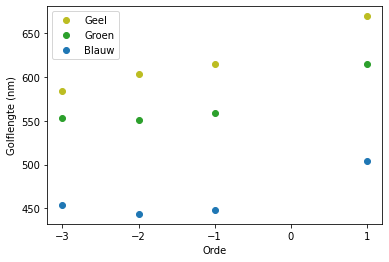

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


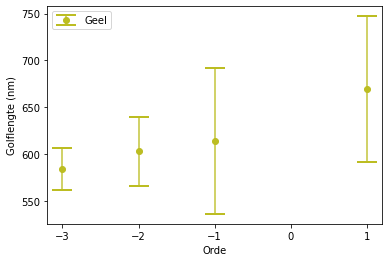

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


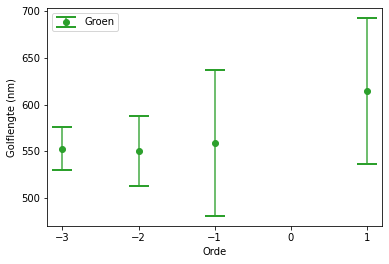

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


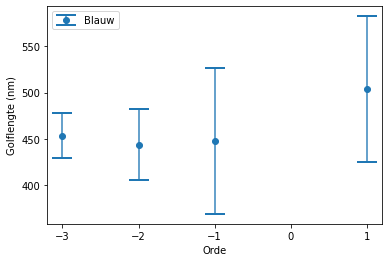

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


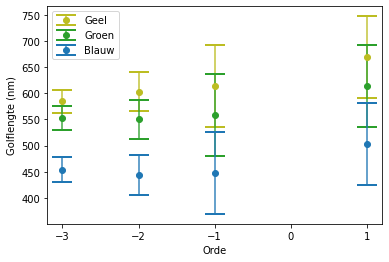

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


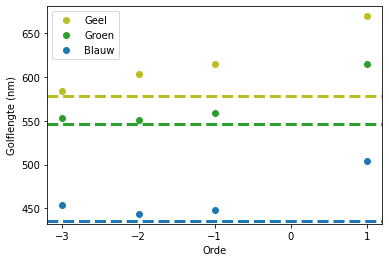

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


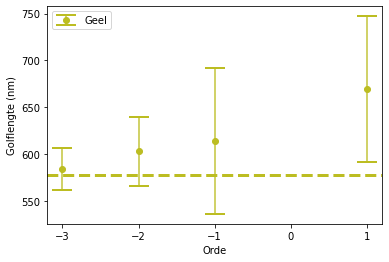

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


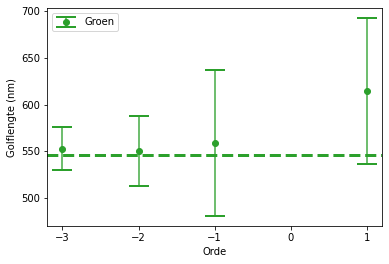

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


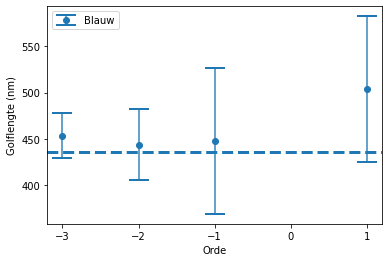

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


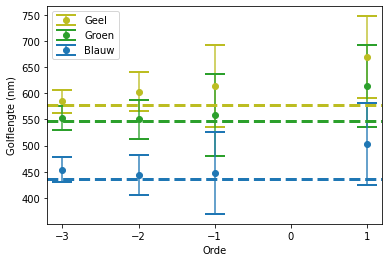

In [21]:
# We tekenen hier het eerste grafiek, namelijk die van de golflentes
# Deze wordt aangeduid met `plot1`

# Deze functie geeft een iterator over de plotdata, namelijk de kleur, orde en golflengtes in nm
def get_color_plot1_data_iter():
    return zip(color, m, wavelength * 1e9, u_wavelength * 1e9)

# Filtreert de data per opgegeven kleur
# Format: array van [orde, golflengte, onzekerheid golflengte]
def filter_plot1_data_by_color(filter_color):
    return np.array([[*dat] for (c, *dat) in get_color_plot1_data_iter() if c == filter_color])

# Hier cachen we de data
plot1_data_yellow = filter_plot1_data_by_color(YELLOW)
plot1_data_green  = filter_plot1_data_by_color(GREEN)
plot1_data_blue   = filter_plot1_data_by_color(BLUE)

# Plot datapunten in de grafiek
def plot1_dots(plt_data, label, color, **kwargs):
    plt.plot(
        plt_data[:,0],
        plt_data[:,1],
        '.',
        label=label,
        color=color,
        markersize=12,
    )

# Plot data als errorbars in de grafiek
def plot1_errorbar(plt_data, label, color, **kwargs):
    eb = plt.errorbar(
        plt_data[:,0],
        plt_data[:,1],
        yerr=plt_data[:,2],
        label=label,
        color=color,
        fmt='.',
        markersize=12,
        capsize=10,
        capthick=2,
        solid_capstyle='projecting',
        **kwargs,
    )
    bars = eb[2]
    for bar in bars:
        bar.set_alpha(0.9)
    return eb

# Plot de eerste grafiek
def plot1(errorbar=True, colors=None, spectral_lines=False):
    if colors is None:
        colors = [YELLOW, GREEN, BLUE]
    plt.figure(figsize=DEFAULT_FIGSIZE)

    plt.xticks(np.arange(m.min(), m.max() + 1))

    def plot_series(*args, **kwargs):
        if errorbar:
            plot1_errorbar(*args, **kwargs)
        else:
            plot1_dots(*args, **kwargs)

    if YELLOW in colors:
        plot_series(plot1_data_yellow, 'Geel', 'tab:olive')

    if GREEN in colors:
        plot_series(plot1_data_green, 'Groen', 'tab:green')

    if BLUE in colors:
        plot_series(plot1_data_blue, 'Blauw', 'tab:blue')

    if spectral_lines:
        axhline_style = { 'linewidth': 3, 'linestyle': 'dashed' }
        if YELLOW in colors:
            plt.axhline(578.1, m.min(), m.max(), color='tab:olive', **axhline_style)
        if GREEN in colors:
            plt.axhline(546.1, m.min(), m.max(), color='tab:green', **axhline_style)
        if BLUE in colors:
            plt.axhline(435.8, m.min(), m.max(), color='tab:blue', **axhline_style)

    plt.xlabel('Orde')
    plt.ylabel('Golflengte (nm)')

    plt.legend()

    save_fig(f'''Plot colors {
        ','.join(colors)
    }{
        ' with error bars' if errorbar else ''
    }{
        ' with trend' if spectral_lines else ''
    }''')

    plt.show()

# Plot een variateit aan grafieken
for sl in [False, True]:
    plot1(errorbar=False, spectral_lines=sl)
    plot1(colors=[YELLOW], spectral_lines=sl)
    plot1(colors=[GREEN], spectral_lines=sl)
    plot1(colors=[BLUE], spectral_lines=sl)
    plot1(spectral_lines=sl)


**Notes:**

- Des te verder de orde van 0 ligt, des te kleiner de onzekerheid.
- De positieve orde heeft een veel hogere afwijking t.o.v. de theoretische waarde vergeleken met die van de negatieve ordes.
- Alle punten liggen in het algemeen boven de theoretische waarde

In [22]:
# Bereken het antwoord op onze vraag

# Theoretische golflengtes van spectraallijnen van kwik

real_yellow_wl = 578.1e-9 # m
u_real_yellow_wl = 1e-9 # m

real_green_wl = 546.1e-9 # m
u_real_green_wl = 0 # m

real_blue_wl = 435.8e-9 # m
u_real_blue_wl = 0 # m

# Ordenen van golflengtes op spectraallijn

def filter_by_color(x, filter_color):
    return np.array([e for (c, e) in zip(color, x) if c == filter_color])

yellow_wl = filter_by_color(wavelength, YELLOW) # m
u_yellow_wl = filter_by_color(u_wavelength, YELLOW) # m
print(f'𝜆_yellow = \n{yellow_wl}')
print(f'u(𝜆_yellow) = \n{u_yellow_wl}')
print()

green_wl = filter_by_color(wavelength, GREEN) # m
u_green_wl = filter_by_color(u_wavelength, GREEN) # m
print(f'𝜆_green = \n{green_wl}')
print(f'u(𝜆_green) = \n{u_green_wl}')
print()

blue_wl = filter_by_color(wavelength, BLUE) # m
u_blue_wl = filter_by_color(u_wavelength, BLUE) # m
print(f'𝜆_blue = \n{blue_wl}')
print(f'u(𝜆_blue) = \n{u_blue_wl}')
print()

# Berekenen van de gemiddeldes

avg_yellow_wl = np.average(yellow_wl, weights=1 / u_yellow_wl ** 2) # m
u_avg_yellow_wl = math.sqrt(1 / np.sum(1 / u_yellow_wl ** 2)) # m
print(f'avg(𝜆_yellow) = {avg_yellow_wl}')
print(f'u(avg(𝜆_yellow)) = {u_avg_yellow_wl}')
print()

avg_green_wl = np.average(green_wl, weights=1 / u_green_wl ** 2) # m
u_avg_green_wl = math.sqrt(1 / np.sum(1 / u_green_wl ** 2)) # m
print(f'avg(𝜆_green) = {avg_green_wl}')
print(f'u(avg(𝜆_green)) = {u_avg_green_wl}')
print()

avg_blue_wl = np.average(blue_wl, weights=1 / u_blue_wl ** 2) # m
u_avg_blue_wl = math.sqrt(1 / np.sum(1 / u_blue_wl ** 2)) # m
print(f'avg(𝜆_blue) = {avg_blue_wl}')
print(f'u(avg(𝜆_blue)) = {u_avg_blue_wl}')
print()

𝜆_yellow = 
[6.69424239e-07 6.14357788e-07 6.03070305e-07 5.84534344e-07]
u(𝜆_yellow) = 
[7.77984937e-08 7.80648984e-08 3.69504313e-08 2.23845251e-08]

𝜆_green = 
[6.14357788e-07 5.59104198e-07 5.50610149e-07 5.52765087e-07]
u(𝜆_green) = 
[7.80648984e-08 7.83084406e-08 3.74283714e-08 2.28536456e-08]

𝜆_blue = 
[5.03680300e-07 4.48102975e-07 4.43742068e-07 4.53575437e-07]
u(𝜆_blue) = 
[7.85290378e-08 7.87266151e-08 3.82530910e-08 2.41022608e-08]

avg(𝜆_yellow) = 5.951624937327675e-07
u(avg(𝜆_yellow)) = 1.8085007091954716e-08

avg(𝜆_green) = 5.56013902829556e-07
u(avg(𝜆_green)) = 1.8393887790907237e-08

avg(𝜆_blue) = 4.5376675303451674e-07
u(avg(𝜆_blue)) = 1.9144930928112147e-08



In [23]:
# Bereken de verschillen in golflengtes
real_delta_wavelength2 = 2e-9 # m
u_real_delta_wavelength2 = 0 # m

phi2 = theta2 - alpha2 # rad
u_phi2 = np.sqrt(u_theta2**2 + u_alpha2**2) # rad
print(f'𝜑_2 = \n{phi2}')
print(f'u(𝜑_2) = \n{u_phi2}')
print()

# De uitgaande hoek duiden we hier aan met v
v = alpha2 - phi2 # rad
u_v = np.sqrt(u_alpha2**2 + u_phi2**2) # rad
print(f'v = \n{v}')
print(f'u(v) = \n{u_v}')
print()

# Afstand tussen de twee maxima
s = L_pixel * s_px # m
u_s = L_pixel * u_s_px # m
print(f's = \n{s}')
print(f'u(s) = \n{u_s}')
print()

# Tussenvariabelen

f_2_inv = 1/f_2 # m^-1
u_f_2_inv = np.abs(-1/f_2**2 * u_f_2) # m^-1
print(f'1/f_2 = \n{f_2_inv}')
print(f'u(1/f_2) = \n{u_f_2_inv}')
print()

s_div_by_two_times_f2 = s / 2 * f_2_inv
u_s_div_by_2_times_f2 = np.sqrt(
    (s * u_f_2_inv)**2 +
    (u_s * f_2_inv)**2
) / 2
print(f's/(2*f_2) = \n{s_div_by_two_times_f2}')
print(f'u(s/(2*f_2)) = \n{u_s_div_by_2_times_f2}')
print()

# Bereken de hoek tussen de maxima

dv = 2 * np.arctan(s_div_by_two_times_f2) # rad
u_dv = 2 * np.abs(1 / (1 + s_div_by_two_times_f2 ** 2) * u_s_div_by_2_times_f2) # rad
print(f'∆v = \n{dv}')
print(f'u(∆v) = \n{u_dv}')
print()

# Tussenvariabel

cos_v = np.cos(v)
u_cos_v = np.abs(-np.sin(v) * u_v)
print(f'cos(v) = {cos_v}')
print(f'u(cos(v)) = {u_cos_v}')
print()

# Bereken het verschil in golflengte

delta_wavelength2 = np.abs(cos_v * N_inv * dv / m2) # m
u_delta_wavelength2 = np.sqrt(
    (u_cos_v * N_inv * dv / m2)**2 +
    (cos_v * u_N_inv * dv / m2)**2 +
    (cos_v * N_inv * u_dv / m2)**2
) # m
print(f'∆𝜆_2 = {delta_wavelength2}')
print(f'u(∆𝜆_2) = {u_delta_wavelength2}')
print()

avg_delta_wavelength2 = np.average(delta_wavelength2, weights=1 / u_delta_wavelength2 ** 2) # m
u_avg_delta_wavelength2 = math.sqrt(1 / np.sum(1 / u_delta_wavelength2 ** 2)) # m
print(f'avg(∆𝜆_2) = {avg_delta_wavelength2}')
print(f'u(avg(∆𝜆_2)) = {u_avg_delta_wavelength2}')
print()

𝜑_2 = 
[0.18325957 0.36651914 0.57595865 0.80285146]
u(𝜑_2) = 
[0.02468268 0.02468268 0.02468268 0.02468268]

v = 
[ 0.04363323 -0.13962634 -0.34906585 -0.57595865]
u(v) = 
[0.03022999 0.03022999 0.03022999 0.03022999]

s = 
[0.0002952 0.0005544 0.000828  0.001296 ]
u(s) = 
[3.6e-06 3.6e-06 3.6e-06 3.6e-06]

1/f_2 = 
5.0
u(1/f_2) = 
0.24999999999999997

s/(2*f_2) = 
[0.000738 0.001386 0.00207  0.00324 ]
u(s/(2*f_2)) = 
[3.79817061e-05 6.98819719e-05 1.03890567e-04 1.62249807e-04]

∆v = 
[0.001476   0.002772   0.00413999 0.00647998]
u(∆v) = 
[7.59633709e-05 1.39763675e-04 2.07780245e-04 3.24496208e-04]

cos(v) = [0.99904822 0.99026807 0.93969262 0.83867057]
u(cos(v)) = [0.00131861 0.0042072  0.01033927 0.01646443]

∆𝜆_2 = [2.45765818e-09 2.28751777e-09 2.16128994e-09 2.26440261e-09]
u(∆𝜆_2) = [1.26526705e-10 1.15744992e-10 1.11048061e-10 1.21796238e-10]

avg(∆𝜆_2) = 2.2834335736847677e-09
u(avg(∆𝜆_2)) = 5.917137102580428e-11



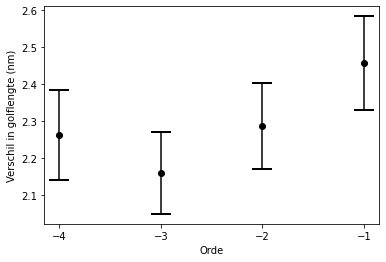

In [30]:
delta_wavelength2_in_nm = delta_wavelength2 * 1e9
u_delta_wavelength2_in_nm = u_delta_wavelength2 * 1e9

plt.figure(figsize=DEFAULT_FIGSIZE)

plt.xticks(np.arange(m2.min(), m2.max() + 1))

plt.xlabel('Orde')
plt.ylabel('Verschil in golflengte (nm)')

plt.errorbar(
    m2,
    delta_wavelength2_in_nm,
    yerr=u_delta_wavelength2_in_nm,
    # label="label",
    color='k',
    fmt='.',
    markersize=12,
    capsize=10,
    capthick=2,
    solid_capstyle='projecting',
)

save_fig("Plot wavelength difference")

plt.show()

**Notes:**

Het verschil in golflengte is voor elke orde groter dan 2nm

In [25]:
# Berekenen van het oplossend vermogen

# Tussenvariabelen voor de golflengte

cos_alpha2 = np.cos(alpha2)
u_cos_alpha2 = np.abs(u_alpha2 * np.sin(alpha2))
print(f'cos(𝛼_2) = {cos_alpha2}')
print(f'u(cos(𝛼_2)) = {u_cos_alpha2}')
print()

sin_phi2 = np.sin(phi2)
u_sin_phi2 = np.abs(u_phi2 * np.cos(phi2))
print(f'sin(𝜑_2) = \n{sin_phi2}')
print(f'u(sin(𝜑_2)) = \n{u_sin_phi2}')
print()

# Bereken de golflengte

wavelength2 = -2 * np.cos(alpha2) * np.sin(phi2) / (m2 * N) # m
u_wavelength2 = 2 * np.sqrt(
    (u_cos_alpha2 * sin_phi2 * N_inv / m2)**2 +
    (cos_alpha2 * u_sin_phi2 * N_inv / m2)**2 +
    (cos_alpha2 * sin_phi2 * u_N_inv / m2)**2
) # m
print(f'𝜆_2 = \n{wavelength2}')
print(f'u(𝜆_2) = \n{u_wavelength2}')
print()

# Tussenvariabel

delta_wavelength2_inv = 1/delta_wavelength2
u_delta_wavelength2_inv = np.abs(-1/delta_wavelength2**2 * u_delta_wavelength2)
print(f'1/∆𝜆_2 = \n{delta_wavelength2_inv}')
print(f'u(1/∆𝜆_2) = \n{u_delta_wavelength2_inv}')
print()

# Bereken het oplossend vermogen

R = wavelength2 * delta_wavelength2_inv
u_R = np.sqrt(
    (wavelength2 * u_delta_wavelength2_inv)**2 +
    (u_wavelength2 * delta_wavelength2_inv)**2
)
print(f'R = \n{R}')
print(f'u(R) = \n{u_R}')
print()

# Dit geldt in de theorie

R_theory = R
u_R_theory = u_R

# Totaal aantal tralie lijnen dat meespeelt

N_tot = np.abs(R_theory / m2)
u_N_tot = np.abs(u_R_theory / m2)
print(f'N_tot = \n{N_tot}')
print(f'u(N_tot) = \n{u_N_tot}')
print()

# Gemiddeld oplossend vermogen

avg_R = np.average(R, weights=1/u_R**2)
u_avg_R = math.sqrt(1 / np.sum(1 / u_R**2))
print(f'avg(R) = {avg_R}')
print(f'u(avg(R)) = {u_avg_R}')
print()

cos(𝛼_2) = 0.9743700647852352
u(cos(𝛼_2)) = 0.003926136554133137

sin(𝜑_2) = 
[0.18223553 0.35836795 0.54463904 0.7193398 ]
u(sin(𝜑_2)) = 
[0.02426937 0.02304327 0.02070064 0.01714603]

𝜆_2 = 
[5.91882803e-07 5.81971670e-07 5.89644413e-07 5.84085973e-07]
u(𝜆_2) = 
[7.88605609e-08 3.74945234e-08 2.25367935e-08 1.41196792e-08]

1/∆𝜆_2 = 
[4.06891409e+08 4.37155073e+08 4.62686649e+08 4.41617580e+08]
u(1/∆𝜆_2) = 
[20947839.64059964 22119395.60614259 23773050.59551141 23753443.61903287]

R = 
[240.83202769 254.41186817 272.82059755 257.94263382]
u(R) = 
[34.39980279 20.84161369 17.47073597 15.21087754]

N_tot = 
[240.83202769 127.20593408  90.94019918  64.48565845]
u(N_tot) = 
[34.39980279 10.42080684  5.82357866  3.80271938]

avg(R) = 260.3767632734829
u(avg(R)) = 9.646852607152004



**Notes:**

Het oplossend vermogen is ongeveer 260. Dat betekent dat we met de opstelling een verschil in golflengte hebben gemeten dat ongeveer 260 keer zo klein is vergeleken met de golflengte zelf.

**Describing the pattern in the processed data:**  


**Notes:**  

# Discussion



### Experiment

> Onze lichtbron malfunctioneerde, waardoor er twee maxima ontstonden. Door de lens schuin te draaien, vielen de maxima op elkaar, waardoor er een betere straal ontstond, maar de camera kon deze niet goed waarnemen.

Voor een beter onderzoek hebben we betere materialen nodig. Dus een betere lichtbron en betere lenzen.

> Het toestel waarmee de hoeken in dit experiment werden gemeten had een schaal van 2 graden.

Daarom hebben we voor een onzekerheid van een graad gekozen. Verbeteren door een digitale hoek meter te gebruiken. Deze zou dan ook digitaal aangestuurd kunnen worden door een elektrische motor.

> Voor het camera deel van het experiment hebben we de gegevens van een andere groep gebruikt.

Idem (voor beter onderzoek, betere materialen zijn nodig). Voor een beter onderzoek kan alles gemeten worden met de camera.

### Analyse plot 1

> Des te verder de orde van 0 ligt, des te kleiner de onzekerheid.

Vermoeden: De onzekerheid in de gemeten hoek is dan kleiner vergeleken met de hoek, denk bij hoek aan phi enz.

> De positieve orde heeft een veel hogere afwijking t.o.v. de theoretische waarde vergeleken met die van de negatieve ordes.

Vermoeden: Dit kan komen door een (*insert: naam voor een fout wanneer we vanuit een verkeerd punt zijn gaan meten*) of door een schuine lens.

> Alle punten liggen in het algemeen boven de theoretische waarde

Vermoeden: De oorzaak zit waarschijnlijk in dat we een van de variabelen te hoog of te laag hebben ingeschat

### Analyse plot 2

> Het verschil in golflengte is voor elke orde groter dan 2nm

Vermoeden: Komt door een fout in de "grootte" van een pixel of door een fout in de afstand $f_2$.

### Oplossend vermogen

Geen opmerkingen.

### Golflengte spectraallijnen

Zie conclusie. Hoe kleiner de golflengte hoe hoger de absolute fout.

Te doen: Oorzaak vinden

### Verschil golflengte gele spectraallijn

Zie conclusie. Relatieve fout is kleiner dan die van de golflengte zelf.

Te doen: Oorzaak vinden


### Overig

Ons experiment heeft de golflengtes helemaal niet nauwkeurig gemeten. Er zijn verbeteringen nodig, zoals eerder besproken om het nauwkeurig te meten.

Vermoeden: Hoogstwaarschijnlijk komt dit doordat ons materiaal toevallig niet fijn genoeg was. Het kan ook zo zijn dat we de fouten verkeerd hebben ingeschat.

Te doen: Vergelijk nog de resultaten van ons met die van een ander groepje om het antwoord op de bovenstaande indirecte vraag te beantwoorden.


# Conclusion

In [26]:
# Doe een strijdigheidsanalyse

def is_strijdig(a, u_a, b, u_b):
    return abs(a - b) > 2 * math.sqrt(u_a**2 + u_b**2)

print('Golflengte van de gele spectraallijn:')
print(f'- Theoretisch: {real_yellow_wl*1e9:.1f} ± {u_real_yellow_wl*1e9:.1f} nm')
print(f'- Praktisch:   {avg_yellow_wl*1e9:.1f} ± {u_avg_yellow_wl*1e9:.1f} nm')
print(f'- Rel. fout:   {u_avg_yellow_wl/avg_yellow_wl:.1%}')
if is_strijdig(avg_yellow_wl, u_avg_yellow_wl, real_yellow_wl, u_real_yellow_wl):
    print("Is strijdig")
else:
    print("Komt overeen")
print()

print('Golflengte van de groene spectraallijn:')
print(f'- Theoretisch: {real_green_wl*1e9:.1f} ± {u_real_green_wl*1e9:.1f} nm')
print(f'- Praktisch:   {avg_green_wl*1e9:.1f} ± {u_avg_green_wl*1e9:.1f} nm')
print(f'- Rel. fout:   {u_avg_green_wl/avg_green_wl:.1%}')
if is_strijdig(avg_green_wl, u_avg_green_wl, real_green_wl, u_real_green_wl):
    print("Is strijdig")
else:
    print("Komt overeen")
print()

print('Golflengte van de blauwe spectraallijn:')
print(f'- Theoretisch: {real_blue_wl*1e9:.1f} ± {u_real_blue_wl*1e9:.1f} nm')
print(f'- Praktisch:   {avg_blue_wl*1e9:.1f} ± {u_avg_blue_wl*1e9:.1f} nm')
print(f'- Rel. fout:   {u_avg_blue_wl/avg_blue_wl:.1%}')
if is_strijdig(avg_blue_wl, u_avg_blue_wl, real_blue_wl, u_real_blue_wl):
    print("Is strijdig")
else:
    print("Komt overeen")
print()


Golflengte van de gele spectraallijn:
- Theoretisch: 578.1 ± 1.0 nm
- Praktisch:   595.2 ± 18.1 nm
- Rel. fout:   3.0%
Komt overeen

Golflengte van de groene spectraallijn:
- Theoretisch: 546.1 ± 0.0 nm
- Praktisch:   556.0 ± 18.4 nm
- Rel. fout:   3.3%
Komt overeen

Golflengte van de blauwe spectraallijn:
- Theoretisch: 435.8 ± 0.0 nm
- Praktisch:   453.8 ± 19.1 nm
- Rel. fout:   4.2%
Komt overeen



In [27]:
print('Verschil in golflengte van de gele spectraallijn:')
print(f'- Theoretisch: {real_delta_wavelength2*1e9:.1f} ± {u_real_delta_wavelength2*1e9:.1f} nm')
print(f'- Praktisch:   {avg_delta_wavelength2*1e9:.1f} ± {u_avg_delta_wavelength2*1e9:.1f} nm')
print(f'- Rel. fout:   {u_avg_delta_wavelength2/avg_delta_wavelength2:.1%}')
if is_strijdig(avg_delta_wavelength2, u_avg_delta_wavelength2, real_delta_wavelength2, u_real_delta_wavelength2):
    print("Is strijdig")
else:
    print("Komt overeen")
print()

Verschil in golflengte van de gele spectraallijn:
- Theoretisch: 2.0 ± 0.0 nm
- Praktisch:   2.3 ± 0.1 nm
- Rel. fout:   2.6%
Is strijdig



# Additional notes, remarks, explanations, thoughts etc